<a href="https://colab.research.google.com/github/jolurf/Coursera/blob/main/Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


3.1632


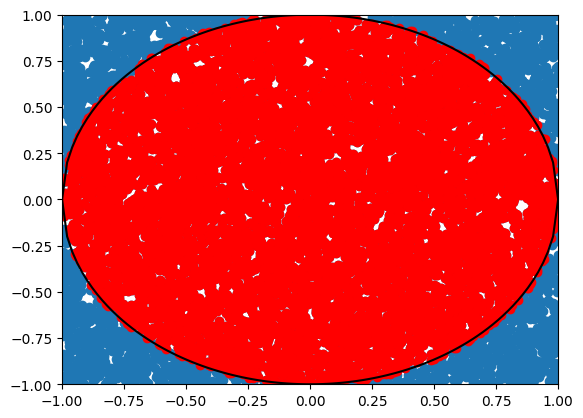

In [ ]:
n_simulations = 10000

def within_circle(x,y):
  xs = []
  ys = []
  for i in range(len(x)):
    if x[i]**2 + y[i]**2 <=1:
      xs += [x[i]]
      ys += [y[i]]
  return xs,ys


x_values = 2*np.random.rand((n_simulations))-1
y_values = 2*np.random.rand((n_simulations))-1
xs,ys = within_circle(x_values,y_values)
plt.scatter(x_values,y_values)
plt.scatter(xs,ys,color='r')
plt.plot(np.linspace(-1,1,100),np.sqrt(1-(np.linspace(-1,1,100)**2)),color='black')
plt.plot(np.linspace(-1,1,100),-np.sqrt(1-(np.linspace(-1,1,100)**2)),color='black')
ax = plt.gca()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
print(4*len(xs)/len(x_values))

# Inversion method

Seja X uma variável aleatória com função cumulativa de probabilidade $F(x) = \mathbb{P}(X<=x)$.<br>
A inversa dessa distribuição é chamada quantil $F^{-1}(u) = inf\{x: F(x) \geq u\}$.<br>
Então, $F^{-1}(\mathbb{U}) \sim X$.   <br>
Se F for contínua então: $F(X) \sim \mathbb{U}([0,1])$


In [ ]:
def general_inversion(f,U):
  return [f(u) for u in U]

## Exponencial

Seja $\lambda > 0$, então:
$X = -\frac{log(U)}{\lambda} \sim exp(\lambda)$.

A densidade da exponencial é $\lambda e^{-\lambda x} \mathbb{1} _ {x\geq 0}$

In [ ]:
def exponencial(lbda, U):
  return - np.log(U)/lbda

Discreta

In [ ]:
def discreta(cp,x,U):
  if len(cp) != len(x):
    raise Exception("Cumulative probability and array of elements should have same length.")
  vetor = list(zip(cp,x))
  vetor.sort(key = lambda arg:arg[0])
  if vetor[-1][0] >1:
    raise Exception("Cumulative probability should not be greater than 1.")
  elif vetor[0][0] < 0:
    raise Exception("Cumulative probability cannot be less than 0.")
  elif max(U) >1:
    raise Exception("Sample U according to uniform([0,1]).")
  def get_last_true(array, value):
      i=0
      while(array[i]<value):
        i += 1
      return i
  cp = [elem[0] for elem in vetor]
  x = [elem[1] for elem in vetor]
  return [x[get_last_true(cp,u)] for u in U]



[0, 1, 2, 2]

## Bernoulli
Corresponde ao caso discreto em que $(x_{0},x_{1}) = (0,1)$ e $(p_0,p_1) = (1-p,1)$

## Binomial
Corresponde à soma de variáveis de Bernoulli.




## Poisson
Corresponde a:<br>
$x_n = n$ e $cp(n)= \sum_{i=0}^{n} e^{-\theta}\frac{\theta^n}{n!}$

In [ ]:
import numpy as np
def poisson(theta,U, verbose=False):
  if max(U) >=1:
    raise Exception("Sample U according to uniform distribution in [0,1].")
  def get_n(theta,u):
    i = 0
    soma = np.e**(-theta)*theta**i/np.math.factorial(i)
    while soma < u :
      i += 1
      soma += np.e**(-theta)*theta**i/np.math.factorial(i)
    if verbose:
      print(i, soma)
    return i
  return [get_n(theta,u) for u in U]


In [ ]:
theta = 1
poisson(theta,[0,0.1,0.73,0.8,0.92,0.9811,0.99635],True)

0 0.36787944117144233
0 0.36787944117144233
1 0.7357588823428847
2 0.9196986029286058
3 0.9810118431238463
4 0.9963401531726563
5 0.9994058151824183


[0, 0, 1, 2, 3, 4, 5]

## Geométrica
Seja $(X_m)_m ≥ 1$ uma sequência de variáveis i.i.d segundo B(p). A variável $X = inf({m ≥ 1 : Xm = 1})$ segue uma distribuição geométrica de parâmetro p, (denotada G(p)):<br> $P(X = n)= p(1 − p)^{n−1}$ para n ≥ 1. <br>
Isto é, a distribuição geométrica é o primeiro momento em que uma binominal assume o valor 1.

In [ ]:
def geometrica(p,U):
  return 1 + np.floor(exponencial(-np.log(1-p),U))

## Cauchy

In [ ]:
def cauchy(sigma,U):
  return sigma*np.tan(np.pi*(U-0.5))

cauchy(1,np.array([1/2,0.7]))

array([0.        , 0.72654253])

## Rayleigh

In [ ]:
def rayleigh(sigma, U):
  return sigma*np.sqrt(-np.log(U))

## Pareto

In [ ]:
def pareto(a,b,U):
  return b/np.power(U,1/a)

## Weibull

In [ ]:
def weibull(a,b,U):
  return b*np.power(-log U,1/a)

## Gaussian

In [ ]:
def gaussian_inverse(mu,sigma, u):
  a  =np.array([2.50662823884, -18.61500062529, 41.39119773534, -25.44106049637])
  b = np.array([-8.47351093090, 23.08336743743, -21.06224101826, 3.13082909833])
  c = np.array([0.3374754822726147,  0.9761690190917186,  0.1607979714918209,  0.0276438810333863, 0.0038405729373609,  0.0003951896511919,  0.0000321767881768,  0.0000002888167364,  0.0000003960315187])
  moro = 0
  if u <= 0.5:
     moro = - gaussian_inverse(mu,sigma,1-u)
  elif(u <= 0.92):
    numerator = np.sum(a * np.array([(u-0.5)**(2*n+1) for n in range(0,4)]))
    denominator = 1 + np.sum( b * np.array([(u-0.5)**(2*n) for n in range(4)]))
    moro =  numerator/denominator
  else:
    moro =  np.sum(c*np.array([np.log(-np.log(1-u))**n for n in range(9)]))
  return sigma*moro + mu



### Box-Muller

In [ ]:
def gaussian(u_exponential, u_radius, mean=0, sd = 1):
  r = np.sqrt(exponential(0.5,u_exponential))
  theta = 2*pi*u_radius
  return mean + sd*r*np.cos(theta), r*np.sin(theta)


# Métodos de Rejeição


Seja Z uma variável aleatória e A um evento de probabilidade não nula. Considere $(Z_n,A_n)_{n \geq 1}$ uma sequência tendo a mesma distribuição de $(A,Z)$. Denote $\nu = inf(n \geq 1: A_n occurs)$. Então $Z_n$ tem distribuição de Z condicional a A.
<br>
<br>

Demonstração:
Seja B um conjunto de Borel, $\mathbb{P}(Z_\nu \in B) = \sum_{n \geq1}\mathbb{P}(Z_n \in B, A{^c}{_1};...;A_n) = \sum_{n \geq1}(1-\mathbb{P}(A))^{n-1}\mathbb{P}(Z_n \in B,A_n) = \mathbb{P}(Z \in B | A)$


Note que nesse algoritmo, aparece uma distribuição geométrica - primeira ocorrência de um evento. Logo, o tempo médio para rodar esse algoritmo é $\frac{1}{\mathbb{P}(A)}$<br>
Aplicação: se eu quero uma variável uniforme em um compacto D, se for muito difícil simular a variável, posso pegar um cubo em torno de D e simular até a variável cair em D.


Here we suppose that the random variable of interest X (possibly multidimensional) has a known
density f, but the direct generation of X is complicated. The principle of the method consists of
generating another random variable Y with density g and to accept the result of Y as realization of X
with a probability proportional to the ratio f(Y)/g(Y).

 Let X and Y be two random variables with values in $R^d$, whose densities with respect to a reference measure μ are f and g respectively. Suppose that there exists a constant c(≥1) satisfying $c g(x) ≥ f(x) μ − a.e.$
Let U be a random variable uniformly distributed on [0, 1] and independent of Y. Then, the distribution of $Y |(c*U*g(Y) < f(Y) $ is the distribution X.
<br><br>
Isto é, eu tiro segundo a distribuição Y, que eu sei retirar e vejo qual a chance de esse elemento vir de X (dado pela razão de densidades). Então, eu aceito ou rejeito esse elemento baseado nessa chance e um fator aleatório uniforme.

In [ ]:
def rejection_acceptance(f,g,c,G):
  '''
  f: density whose sample I want - X
  g: density known how to sample - Y
  c: upper bound for f/g
  G: inverse of cdf of density g
  return: y sampled according to distribution X '''
  u = np.random.rand(1)
  y = general_inversion(G,np.random.rand(1))
  while(c*u*g(y) > f(y)): #while probability of sampling is more likely to g, keep it on
    u = np.random.rand(1)
    y = general_inversion(G,np.random.rand(1))
  return y

## Note que c é uma constante idealmente baixa para que a distribuição funcione rapidamente


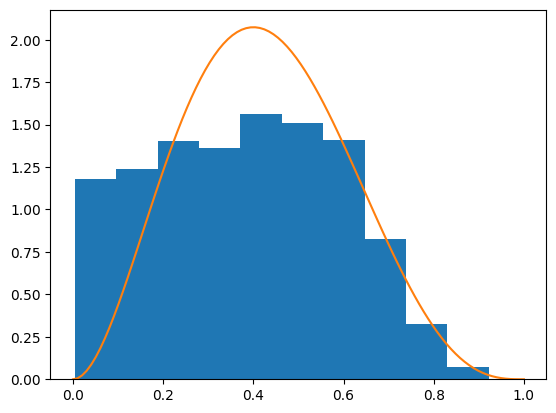

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
alfa = 3
beta = 4
def beta_sample(alfa, beta):
  x_min = (alfa-1)/(alfa+beta -2)
  c = stats.beta.pdf(x_min,alfa, beta)
  u = np.random.rand(1)
  y = np.random.rand(1)
  while(c*u*y > stats.beta.pdf(y,alfa,beta)):
    u = np.random.rand(1)
    y = np.random.rand(1)
  return y

array = np.array([beta_sample(alfa,beta) for n in range(2000)])
plt.hist(array, density=True,bins=10)
x= np.linspace(0,1,100)
plt.plot(x,stats.beta.pdf(x,alfa,beta))

# Copulas